# IMPORTING REQUIRED PACKAGES AND DATASETS

In [1]:
import sys
print(sys.version)

3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
import sklearn as sk
%matplotlib inline

In [3]:
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [4]:
#Load Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
data = pd.read_csv(url, names=names)
data.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# EXPLORING AND ANALYSING DATA

In [5]:
print(data.shape)

(150, 5)


In [6]:
#Describe
data.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
#Distribution of classes
data.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C0EA800310>,
      dtype=object)

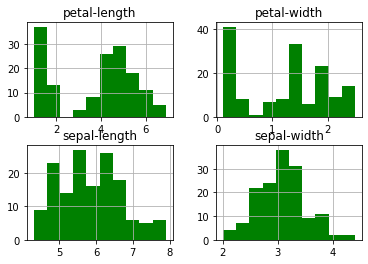

In [8]:
data.hist(color='green')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C0EA917820>,
      dtype=object)

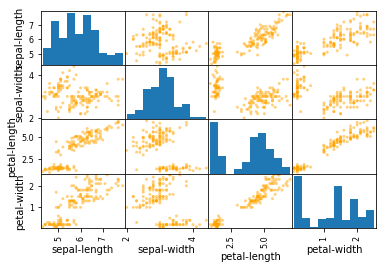

In [9]:
scatter_matrix(data, color='orange')

# TRAIN, VALIDATION AND TEST DATASETS


In [10]:
#Splitting dataset into training data(80%) and validation set(20%)
array = data.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 8

In [11]:
X_train, X_valid, Y_train, Y_valid = model_selection.train_test_split(X,Y,test_size = validation_size, random_state = seed)

# USING MODELS (LOGISTIC REGRESSION, K-NEAREST NEIGHBORS, SUPPORT VECTOR MACHINE) FOR PREDICTIONS

In [12]:
#test option and evaluation metrics
scoring = "accuracy"

In [13]:
models=[]
models.append(('LR',LogisticRegression()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('SVM',SVC()))

In [14]:
print(models)

[('LR', LogisticRegression()), ('KNN', KNeighborsClassifier()), ('SVM', SVC())]


In [15]:
#EVALUATE EACH MODEL
res= []
names = []

for name,model in models:
    kfold = model_selection.KFold(n_splits=10, random_state = seed)
    cv_res =model_selection.cross_val_score(model,X_train, Y_train, cv =kfold, scoring=scoring)
    res.append(cv_res)
    names.append(name)
    msg = "%s: %f (%f)" %(name, cv_res.mean(), cv_res.std())
    print(msg)

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number o

LR: 0.966667 (0.055277)
KNN: 0.983333 (0.033333)
SVM: 0.966667 (0.055277)


C:\Users\ACER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

In [16]:
for name, model in models:
    model.fit(X_train, Y_train)
    pred = model.predict(X_valid)
    print(name)
    print()
    print(accuracy_score(Y_valid,pred))
    print()
    print(classification_report(Y_valid,pred))

LR

0.9

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.80      0.89      0.84         9
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.90      0.90      0.90        30
   weighted avg       0.90      0.90      0.90        30

KNN

0.9

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.80      0.89      0.84         9
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.90      0.90      0.90        30
   weighted avg       0.90      0.90      0.90        30

SVM

0.9333333333333333

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.82      1.00 

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
